#### CSCE 670 :: Information Storage and Retrieval :: Texas A&M University :: Spring 2020


# Spotlight:  Dataset crawled from Meetup.com

### Name: Xiangqi Jiang         UIN: 729007649

With the growing up of online social networks, online and offline social networks are gradually merging, which makes the rapid development of domestic and overseas social websites such as Meetup (https://www.meetup.com), Plancast, Douban (https://www.douban.com) and so on. They all provide users with a social platform for online organizing and offline participating in events. Network applications like this form are called Event-Based Social Networks (EBSN). How to pick up the offline events that users are willing to joining in and improve their participation is one of the hot issues of current research.

The complete dataset is from the work of Liu et al. 2012, which is crawled from Meetup.com from Oct 2011 to Jan 2012. The dataset contains about 4 million users, 2 million events, 70 thousand online groups. https://drive.google.com/open?id=1aAw48bJ6IqAGLObigvg5St2v0TnM7DuN

We mainly pay attention to 3 types of nodes in Meetup: user, group, event. Users can join different groups online, groups can host events offline or online, and users can participate in these events by RSVP online and join the events.


## Part1: Where the dataset comes from
There 3 steps to get the data. Because the whole Meetup network is too big to show in this notebook, I crawl several instances as examples.
### 1. Get all the categories
There are 33 valid categoies in Meetup.com,each of them corresponding to a big topic. For example, the category whose id is 1 contains names "Arts & Culture" and the category whose id is 18 names "Book Clubs".

The Meetup API we use is "Get /2/categoires/".

In [194]:
import os
import json
from selenium import webdriver
import numpy as np
import pandas as pd
import csv
import math
import codecs

In [264]:
url1 = 'https://api.meetup.com/2/categories?'
url2 = 'offset=0&format=json&page=500&order=shortname&desc=false&sig_id=305223914&sig=9836aec623dd863e6e85c6b93b3e6b89d59bb3b6'
path = './Meetup_data'
def mkdir(path):
    folder = os.path.exists(path)
    if not folder:  
        os.makedirs(path)  # makedirs 
def getcategory():
    url=url1+url2
    browser = webdriver.Chrome()
    # browser.set_script_timeout(50)
    browser.implicitly_wait(50)
    browser.get(url)
    try:
        content = browser.find_element_by_css_selector('body').text
        #print(content)
        count = json.loads(content)
        #print(count)
        for i in range(42):
            id = json.loads(content)['results'][i]['id']
            name = json.loads(content)['results'][i]['name']
            print(id,name)
            pathc=path+'/category'+str(id)
#             mkdir(pathc)
    finally:
            browser.close()

In [265]:
getcategory()

1 Arts & Culture
18 Book Clubs
37 ???chapter_category.business.name???
2 Career & Business
3 Cars & Motorcycles
39 ???chapter_category.classes.name???
4 Community & Environment
5 Dancing
41 ???chapter_category.dating.name???
45 ???chapter_category.description.name???
6 Education & Learning
8 Fashion & Beauty
9 Fitness
10 Food & Drink
11 Games
13 Movements & Politics
14 Health & Wellbeing
15 Hobbies & Crafts
16 Language & Ethnic Identity
12 LGBT
17 Lifestyle
20 Movies & Film
21 Music
22 New Age & Spirituality
42 ???chapter_category.one-on-one.name???
23 Outdoors & Adventure
24 Paranormal
25 Parents & Family
26 Pets & Animals
27 Photography
38 ???chapter_category.products.name???
43 ???chapter_category.promotions.name???
28 Religion & Beliefs
29 Sci-Fi & Fantasy
30 Singles
31 Socializing
32 Sports & Recreation
33 Support
34 Tech
40 ???chapter_category.track-singles.name???
44 ???chapter_category.venues.name???
36 Writing


### 2. Get groups
Each group must belong to a category. Hence, we go though all the categories to get all groups corresponding to each category. We get id, urlname, members, city, join_mode and description for each group.

The Meetup API we use is "Get /2/groups" and input the category id we want to crawl.

In [190]:
#url1='https://api.meetup.com/2/groups?'
#url2='zip=10001&format=json&lon=-73.9899978638&photo-host=public&page=50&radius=25.0&fields=&lat=40.75&order=id&desc=false&sig_id=305223914&sig=b92dd1e4056dc0c495f262f9ab643872a7b897f3&'
# url0='https://api.meetup.com/2/groups?zip=10001&format=json&lon=-73.9899978638&photo-host=public&page=20&radius=25.0&fields=&lat=40.75&order=id&desc=false&sig_id=305223914&sig='
# url0+='0aacdc56017084c7c4ae859a5a0958226d9cefdc'
def getgroup(i,sig):
#     for i in range(1,36):
#         i=36
        url0='https://api.meetup.com/2/groups?zip=10001&format=json&lon=-73.9899978638&photo-host=public&page=20&radius=25.0&fields=&lat=40.75&order=id&desc=false&sig_id=305223914&sig='
        url0+=sig
        print('category id: '+str(i))
        if not (i == 7 or i == 19 or i==35):
            catid = i
            path = './Meetup_data/category' + str(catid)
            offset = 0
            try:
                url = url0 + '&category_id=' + str(catid) + '&offset=' + str(offset)
                option = webdriver.ChromeOptions()
                option.add_argument('headless') # 设置option
                browser = webdriver.Chrome(chrome_options=option)
                # browser.set_script_timeout(50)
                browser.implicitly_wait(50)
                browser.get(url)
                content = browser.find_element_by_css_selector('body').text
                #print(content)
                count = json.loads(content)['meta']['total_count']
                number = math.ceil(count / 20)
            finally:
                browser.close()
            while number > 0:
                print('offset: '+str(number))
                try:
                    url = url0 + '&category_id=' + str(catid) + '&offset=' + str(offset)
                    browser = webdriver.Chrome(chrome_options=option)
                    # browser.set_script_timeout(50)
                    browser.implicitly_wait(50)
                    browser.get(url)
                    content = browser.find_element_by_css_selector('body').text
                    #print(content)
                    data = json.loads(content)["results"]
                    #file_path = path + '/group' + str(offset) + '.json'
                    #with open(file_path, 'w', encoding='utf-8') as fw:
                        #fw.write(content)
                    pathcsv = path + '/' + str(catid) + '.csv'
                    frame = pd.DataFrame(data, columns=['id', 'urlname', 'members', 'city', 'join_mode', 'description'])
                    # print(frame)
                    if offset == 0:
                        frame.to_csv(pathcsv)
                    else:
                        frame.to_csv(pathcsv, mode='a', header=False)
                    offset = offset + 1
                    number = number - 1
                finally:
                    browser.close()


In [191]:
getgroup(36,'0aacdc56017084c7c4ae859a5a0958226d9cefdc')

category id: 36


c:\users\jmith\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: use options instead of chrome_options


offset: 9


c:\users\jmith\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: use options instead of chrome_options


offset: 8
offset: 7
offset: 6
offset: 5
offset: 4
offset: 3
offset: 2
offset: 1


In [269]:
#This is an example of all groups information we get in category whose id is 36
with open('./Meetup_data/category36/36.csv', 'r',encoding='utf-8') as f:
    reader = csv.reader(f) 
    result = list(reader)
    print(result)

[['', 'id', 'urlname', 'members', 'city', 'join_mode', 'description'], ['0', '137842', 'scifiwriting-19', '84', 'New York', 'approval', '<p>Welcome. This is a group for people who write science fiction and fantasy and people who want to write science fiction and fantasy. We welcome all skill levels as long as the group rules are adhered to.</p>'], ['1', '205659', 'NYC-Writers-Circle', '1845', 'New York', 'approval', '<p>Welcome to our Writers\' Salon! We\'re an eclectic group of aspiring and professional writers. Our events are fun social gatherings where, in a relaxed environment, we get together to make literary friends and professional contacts. We meet to discuss our work, listen to readings and information about the writing/publishing industry, motivate, collaborate, and above all have fun.</p>\n<p>TO JOIN: We\'re looking for intelligent, creative, and cultured people to join our writers circle of friends. When you apply, you must complete ALL the online profile questions AND add 

### 3. Get events
We can find the information of a specfic event by knowing its urlname, which is stored in the group file we crawled before. A group can hold several events or it can hold no events.

The Meetup API we use is "Get /urlname/events".

To support these researches based on the real dataset from Meetup.com,this notebook aims at crawling data from Meetup.com using the RESTful HTTP provided by Meetup API. From August 2019, the website changed from API key to OAuth, which makes a lot trouble to us.

Here are the instruction to use OAuth.
    * Create a new OAuth consumer in Meetup.com and provide a redirect URI.
    * Wait for the supports of the website to approve the application.
    * After approved by the website, we can get a client id, a client secret.
    * Use these messages to visit the authorization_url, login with Meetup account details, to authorize access. And this will redirect  the user to redirect_uri appended with the authorization code given by Meetup
    * The redirect URI might look something like: https://youNeedToOwnAndHostThisServer.com/callback?code=abcdefg&state=xyzxyz
    * Use the authorization code (single-use only) to request for the token from Meetup server
    * Then we can use API by the token we get.

In [245]:
my_key='pml4k3i9adgqpsh6i7pthuf9bl'
my_secret='psqh9km3fdu7fagsd80sn071eb'

from requests_oauthlib import OAuth2Session

client_id = r'pml4k3i9adgqpsh6i7pthuf9bl'
client_secret = r'psqh9km3fdu7fagsd80sn071eb'
redirect_uri = r'https://github.com/xqjiang423/spotlight-for-csce670'
scopes = ['rsvp', 'ageless']
oauth = OAuth2Session(client_id, redirect_uri=redirect_uri, scope=scopes)
authorization_url, state = oauth.authorization_url('https://secure.meetup.com/oauth2/authorize')
print(authorization_url)

# Then, the user will need to visit the authorization_url, login with Meetup account details, to authorize access.
# This will then redirect the user to redirect_uri appended with the authorization code given by Meetup.
# In the example above, the redirect URI might look something like:
# https://youNeedToOwnAndHostThisServer.com/callback?code=abcdefg&state=xyzxyz



https://secure.meetup.com/oauth2/authorize?response_type=code&client_id=pml4k3i9adgqpsh6i7pthuf9bl&redirect_uri=https%3A%2F%2Fgithub.com%2Fxqjiang423%2Fspotlight-for-csce670&scope=rsvp+ageless&state=0fblTGxMLWWSyYPqpz7XNlSTO855rY


In [246]:
code = r'7249f2f5df37c7935df9806630d67e0f' # this is the authorization code in the full redirect URI (see example above)
token_url = r'https://secure.meetup.com/oauth2/access'
# the following is to use the authorization code (single-use only) to request for the token from Meetup server
token = oauth.fetch_token(token_url, client_secret=client_secret, code=code, include_client_id=True)
# If successful, token will now contain the actual token code (in json format), within the access_token field.

In [236]:
def test():
    r = oauth.get(r'https://api.meetup.com/sketching/events?&sign=true&photo-host=public&page=50')
    data=json.loads(r.content)
    # data=data[0]
    print(len(data))

In [249]:
def retrieve_group_id(category):
    with codecs.open('./Meetup_data/category' + str(category) +'/' + str(category) + '.csv', 'r', encoding='utf-8') as fr:
        content = pd.read_csv(fr)
        ids = content['urlname']
        # members = content['members']
        return ids
def getevent(cat):
    groups_id = pd.DataFrame(retrieve_group_id(cat))
    print(len(groups_id))
    for i in range(len(groups_id)):
        group_urlname = groups_id.ix[i]
        print(group_urlname[0])
        print(i) #i-1 has finised
        r = oauth.get(r'https://api.meetup.com/'+str(group_urlname[0])+'/events?&sign=true&photo-host=public&page=100')
        #url=url1+url2+'&group_urlname='+str(group_urlname[0])
        #content = browser.find_element_by_css_selector('body').text
        #print(content)
        data = json.loads(r.content)
        print(data)
        pathcsv = './Meetup_data/total_events_in_category' + str(cat) + '.csv'
        frame = pd.DataFrame(data, columns=['name','id','utc_offset', 'venue', 'rsvp_limit', 'headcount', 'visibility','waitlist_count','created','maybe_rsvp_count','description','yes_rsvp_count','duration','photo_url','time','updated','group','status'])
            # print(frame)
        if i == 0:
            frame.to_csv(pathcsv, encoding='utf-8')
        else:
            frame.to_csv(pathcsv, mode='a',encoding='utf-8', header=False)  

# This is an example of all events hosted by groups in category 1.
getevent(1)

369
unionsquare
0
[{'created': 1581605619000, 'duration': 7200000, 'id': '268682567', 'name': 'Cry the Beloved Country by Alan Paton', 'date_in_series_pattern': False, 'status': 'upcoming', 'time': 1586302200000, 'local_date': '2020-04-07', 'local_time': '19:30', 'updated': 1581606097000, 'utc_offset': -14400000, 'waitlist_count': 0, 'yes_rsvp_count': 5, 'venue': {'id': 12114922, 'name': '2 Fifth Avenue', 'lat': 40.714351654052734, 'lon': -74.00597381591797, 'repinned': True, 'address_1': '2 Fifth Avenue - Library Meeting room to the left of the Lobby', 'city': 'New York', 'country': 'us', 'localized_country_name': 'USA', 'zip': '', 'state': 'NY'}, 'group': {'created': 1097002747000, 'name': 'Union Square Reading Group', 'id': 178198, 'join_mode': 'open', 'lat': 40.72999954223633, 'lon': -73.98999786376953, 'urlname': 'unionsquare', 'who': 'Book Lovers', 'localized_location': 'New York, NY', 'state': 'NY', 'country': 'us', 'region': 'en_US', 'timezone': 'US/Eastern'}, 'link': 'https://

c:\users\jmith\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


[]
newyorkmuseumclub
2
[{'local_time': '17:30', 'local_date': '2020-03-26', 'link': 'https://www.meetup.com/newyorkmuseumclub/events/nlnbrrybcfbjc/', 'visibility': 'public_limited', 'group': {'created': 1154640228000, 'name': 'NEW YORK MUSEUM & ART CLUB', 'id': 297702, 'join_mode': 'open', 'lat': 40.709999084472656, 'lon': -74.01000213623047, 'urlname': 'newyorkmuseumclub', 'who': 'Museumologists', 'localized_location': 'New York, NY', 'state': 'NY', 'country': 'us', 'region': 'en_US', 'timezone': 'US/Eastern'}, 'waitlist_count': 0, 'yes_rsvp_count': 6, 'duration': 7200000, 'time': 1585258200000, 'utc_offset': -14400000, 'name': 'FREE Speed Dating Online!', 'id': 'nlnbrrybcfbjc'}, {'local_time': '18:00', 'local_date': '2020-03-26', 'link': 'https://www.meetup.com/newyorkmuseumclub/events/gvvwqrybcfbjc/', 'visibility': 'public_limited', 'group': {'created': 1154640228000, 'name': 'NEW YORK MUSEUM & ART CLUB', 'id': 297702, 'join_mode': 'open', 'lat': 40.709999084472656, 'lon': -74.01000

## Part2: How to use the dataset

The dataset is mainly used to do researches on event recommendation on networks like event based social network. For example, Mo et al.2018 use it to construct a heterogeneous graph for an event based social network and propose a reverse random walk with restart to compute node proximity on the graph.

When building the heterogeneous graph, the paper select region node and subject node. Because there are more than 70,000 subjects and regions in all over the world, the region nodes and subject nodes must be clustered firstly.

Here is an example on how to use the dataset to cluster the region nodes.

109394


c:\users\jmith\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


88183.78353196531


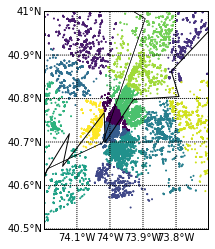

In [289]:
from sklearn.cluster import KMeans
from sklearn import metrics
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
def Dist(londata, latdata):
    from geopy import distance
    return distance.vincenty(londata, latdata).meters
X=pd.read_csv("./event_lon_lat.csv",usecols=[1,2])
#print(X.iloc[:,0])
X=X[(X.iloc[:,0]>=-74.2)&(X.iloc[:,0]<=-73.7)&(X.iloc[:,1]>=40.5)&(X.iloc[:,1]<=41.0)]
londata=X.iloc[:,0]
latdata=X.iloc[:,1]
X=np.array(X)
londata=np.array(londata)
latdata=np.array(latdata)
print(len(X))
#k-means
data_cluster = KMeans(n_clusters=15).fit_predict(X)
assess = metrics.calinski_harabaz_score(X, data_cluster)
print(assess)
#DBSCAN
#data_cluster = DBSCAN(metric=Dist).fit_predict(X)
m = Basemap(projection='stere', lat_0=40.7143528, lon_0=-74.0059731, \
            llcrnrlat=40.5, urcrnrlat=41.0, \
            llcrnrlon=-74.2, urcrnrlon=-73.7, \
            rsphere=6371200., resolution='l', area_thresh=20000)  
m.drawcoastlines()  
m.drawmapboundary() 
m.drawcountries()  
m.drawstates()
parallels = np.arange(40., 42., 0.1)  
m.drawparallels(parallels, labels=[1, 0, 0, 0], fontsize=10)
meridians = np.arange(-75., -72., 0.1)  
m.drawmeridians(meridians, labels=[0, 0, 0, 1], fontsize=10)
lon, lat = m(londata, latdata) 
m.scatter(lon, lat, s=1, marker='o',c=data_cluster)  
plt.show()


## Resources
The complete dataset is from the work of Liu et al. 2012, which is crawled from Meetup.com from Oct 2011 to Jan 2012. The dataset contains about 4 million users, 2 million events, 70 thousand online groups. https://drive.google.com/open?id=1aAw48bJ6IqAGLObigvg5St2v0TnM7DuN
## References
    1.Liu, Xingjie, et al. "Event-based social networks: linking the online and offline social worlds." Proceedings of the 18th ACM SIGKDD international conference on Knowledge discovery and data mining. 2012.
    2.Mo, Yijun, et al. "Event recommendation in social networks based on reverse random walk and participant scale control." Future Generation Computer Systems 79 (2018): 383-395.
    3.https://github.com/pferate/meetup-api/pull/
    4.https://secure.meetup.com/meetup_api